# Principal Componet Analysis ***PCA***

Reduccion de dimensiones

In [1]:
import time
start_i = time.time()

In [2]:
import pandas as pd
import warnings
# pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [4]:
target = "Class"
data = pd.read_csv("../_datasets/creditcard.csv.gz", sep=",")
print("data.shape=",data.shape)
data.head()

data.shape= (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# data = pd.read_csv("../_datasets/ObesityDataSet_raw_and_data_sinthetic.csv.gz", sep=",")
# # target
# target = "NObeyesdad"
# print(dict(data[target].value_counts().sort_index()))
# data[target] = data[target].str.contains("Obesity").map({True:1, False:0})
# print(dict(data[target].value_counts().sort_index()))
# data = pd.get_dummies(data, drop_first=True)
# print("data.shape=",data.shape)
# data.head()

In [6]:
# X = data.drop([target],axis=1).copy()
X = data.drop([target,"Time","Amount"],axis=1).copy()
# X = data.drop([target,"Time"],axis=1).copy()
# X = data.drop([target],axis=1).copy()
x_cols = list(X.columns)
y = data[target].copy()
print(f"X={X.shape}, [{', '.join(x_cols)}]")
print(f"y={y.shape}")

X=(284807, 28), [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28]
y=(284807,)


## Implementacion de PCA

Se deben definir el numero de componentes a crear.

In [7]:
from sklearn.decomposition import PCA

In [8]:
n_components = 10
print(f"Numero de variables = {X.shape[1]}")
print(f"Numero de componentes = {n_components} ({round(n_components/X.shape[1]*100,2)}%)")

Numero de variables = 28
Numero de componentes = 10 (35.71%)


In [9]:
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=10)

In [10]:
def get_feature_importance(pca):
    from numpy import abs as n_abs
    ft_imp = pd.DataFrame([pca.explained_variance_ratio_, [X.columns[n_abs(c).argmax()] for c in pca.components_]]).T.reset_index()
    ft_imp.columns = ["pc","variance","ft_with_more_variance"]
    ft_imp["cum_variance"] = ft_imp["variance"].cumsum()
    zf = len(str(pca.n_components))
    # ft_imp["pc"] = [f"C{str(c+1).zfill(zf)}" for c in ft_imp["pc"]]
    ft_imp["pc"] = [f"C{c+1}" for c in ft_imp["pc"]]
    ft_imp = ft_imp[["pc","variance","cum_variance","ft_with_more_variance"]]
    return ft_imp


In [11]:
ft_imp = get_feature_importance(pca)
ft_imp

,pc,variance,cum_variance,ft_with_more_variance
0,C1,0.124838,0.124838,V1
1,C2,0.088729,0.213567,V2
2,C3,0.074809,0.288376,V3
3,C4,0.065231,0.353608,V4
4,C5,0.06199,0.415598,V5
5,C6,0.057756,0.473354,V6
6,C7,0.049798,0.523152,V7
7,C8,0.046416,0.569568,V8
8,C9,0.039273,0.608842,V9
9,C10,0.038569,0.647411,V10


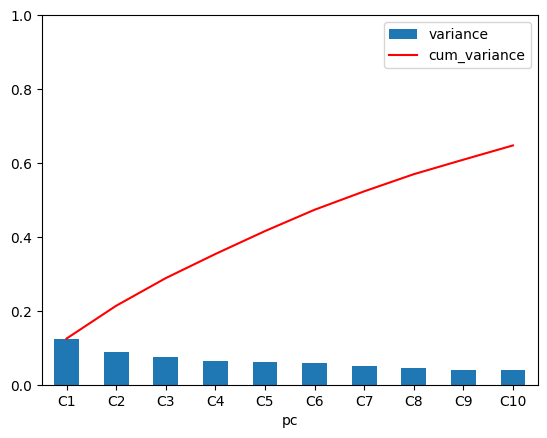

In [12]:
## Plot importance by variance
ft_imp.plot(x="pc", y="variance", kind="bar", legend="VAR", ylim=(0,1));
ft_imp["cum_variance"].plot(kind="line", c="red", legend="VAR_cum");

In [13]:
Xpca = pca.transform(X)
Xpca = pd.DataFrame(Xpca, columns=ft_imp["pc"], index=X.index)
Xpca

pc,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,1.359808,0.072812,-2.536363,1.378170,0.338306,0.462350,0.239187,-0.098799,0.363898,-0.090467
1,-1.191891,-0.266172,-0.166282,0.448017,-0.060013,-0.082083,-0.077894,-0.086033,-0.259343,0.173188
2,1.358440,1.339863,-1.773572,0.379752,0.503315,1.800326,0.791484,-0.245686,-1.513032,-0.222081
3,0.966360,0.184844,-1.793283,-0.863058,0.010798,1.247061,0.242089,-0.373893,-1.385633,0.045912
4,1.158266,-0.877741,-1.548896,0.403152,0.407220,0.095699,0.592483,0.271406,0.820250,-0.757587
...,...,...,...,...,...,...,...,...,...,...
284802,11.881158,-10.072025,9.834626,-2.066782,5.364550,-2.606793,-4.917929,-7.305959,1.912142,-4.367447
284803,0.732835,0.054969,-2.035267,-0.738506,-0.868078,1.058223,0.024355,-0.293066,0.588097,0.971700
284804,-1.919535,0.301183,3.249536,-0.557758,-2.630499,3.031192,-0.296283,-0.708309,0.432007,0.481008
284805,0.240432,-0.530224,-0.702628,0.689945,0.377859,0.623365,-0.689281,-0.678831,0.398349,0.401752


In [14]:
data_pca = pd.concat([y, Xpca], axis=1)
data_pca.head()

,Class,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,0,1.359808,0.072812,-2.536363,1.378170,0.338306,0.462350,0.239187,-0.098799,0.363898,-0.090467
1,0,-1.191891,-0.266172,-0.166282,0.448017,-0.060013,-0.082083,-0.077894,-0.086033,-0.259343,0.173188
2,0,1.358440,1.339863,-1.773572,0.379752,0.503315,1.800326,0.791484,-0.245686,-1.513032,-0.222081
3,0,0.966360,0.184844,-1.793283,-0.863058,0.010798,1.247061,0.242089,-0.373893,-1.385633,0.045912
4,0,1.158266,-0.877741,-1.548896,0.403152,0.407220,0.095699,0.592483,0.271406,0.820250,-0.757587


In [15]:
def plot_cluster(data:pd.DataFrame,target:str,x:str,y:str, title:str=None):
    plt.figure(figsize=(15,5))
    data = data.copy()
    if min(y)==-1:
        y = y.map({1:0,-1:1})
    sns.scatterplot(data=data[data[target]==0], x=x, y=y, alpha=0.3, s=5, label="Normal")
    sns.scatterplot(data=data[data[target]==1], x=x, y=y, s=10, color="red", label="Anomaly")
    if title!=None:
        plt.title(title)
    plt.show()

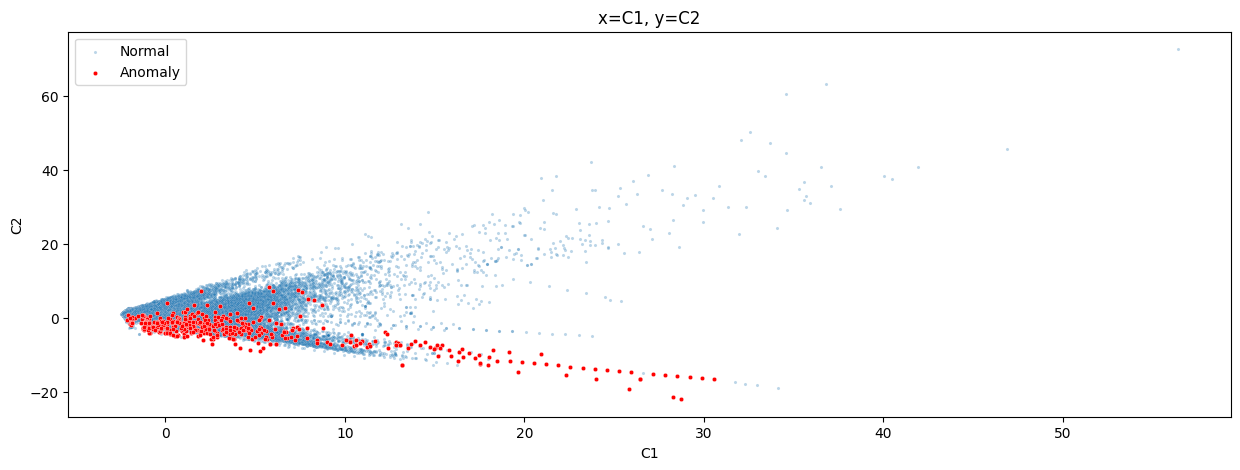

In [16]:
plot_cluster(data=data_pca, target=target, x="C1", y="C2", title="x=C1, y=C2")

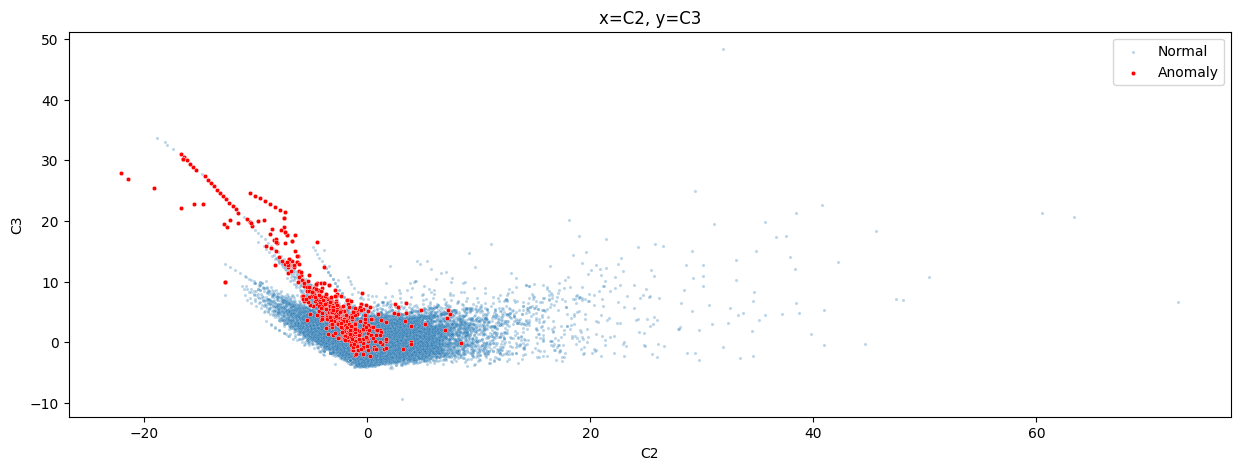

In [17]:
plot_cluster(data=data_pca, target=target, x="C2", y="C3", title="x=C2, y=C3")

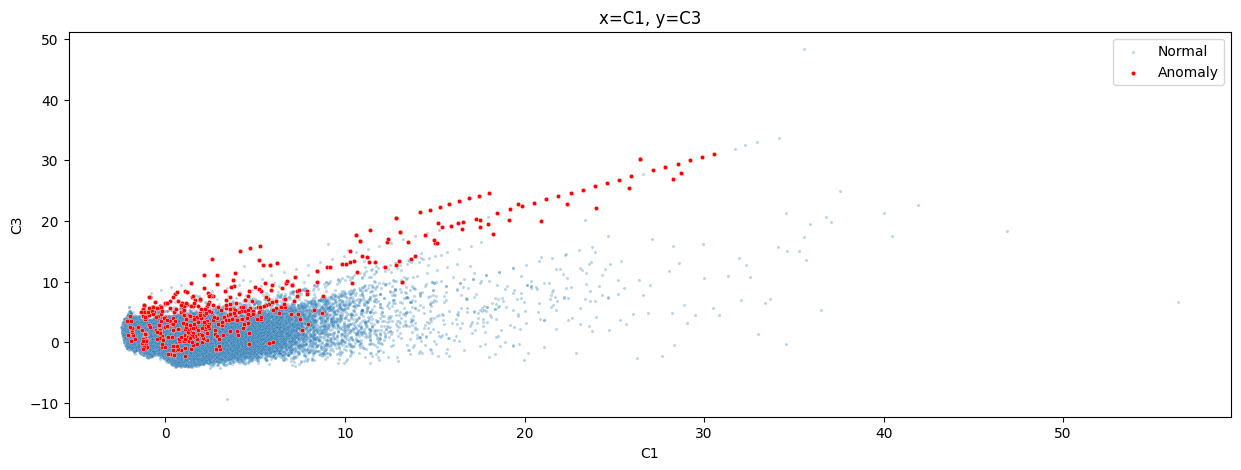

In [18]:
plot_cluster(data=data_pca, target=target, x="C1", y="C3", title="x=C1, y=C3")

In [19]:
## 3 componentes

In [20]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=3)

In [21]:
ft_imp = get_feature_importance(pca)
ft_imp

,pc,variance,cum_variance,ft_with_more_variance
0,C1,0.124837,0.124837,V1
1,C2,0.088728,0.213565,V2
2,C3,0.074808,0.288373,V3


In [22]:
Xpca = pca.transform(X)
Xpca = pd.DataFrame(Xpca, columns=ft_imp["pc"], index=X.index)
data_pca = pd.concat([y, Xpca], axis=1)
data_pca.head()

,Class,C1,C2,C3
0,0,1.359547,0.071612,-2.538907
1,0,-1.192953,-0.264745,-0.170536
2,0,1.355823,1.343127,-1.779627
3,0,0.966080,0.185192,-1.791406
4,0,1.158436,-0.874466,-1.548758


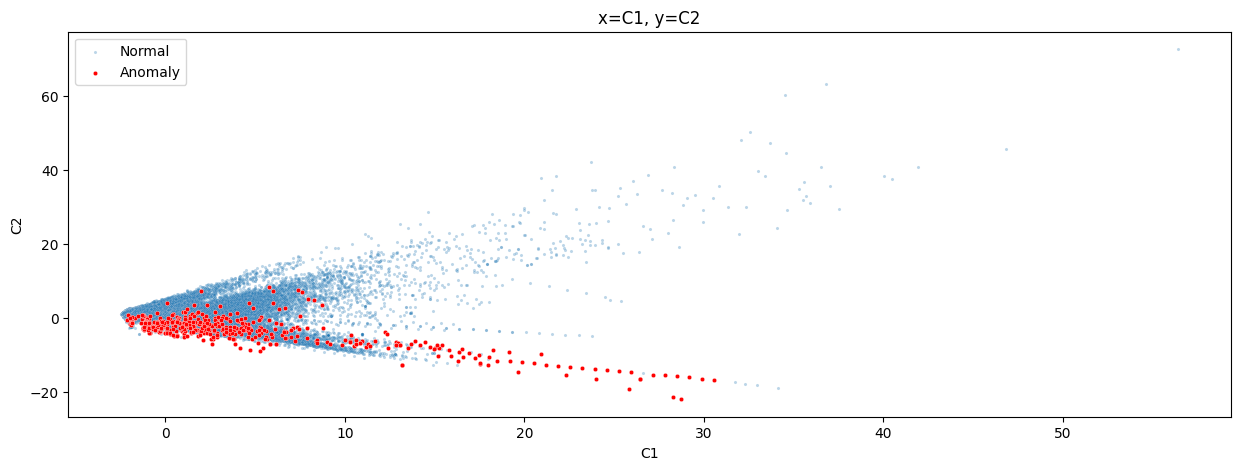

In [23]:
plot_cluster(data=data_pca, target=target, x="C1", y="C2", title="x=C1, y=C2")

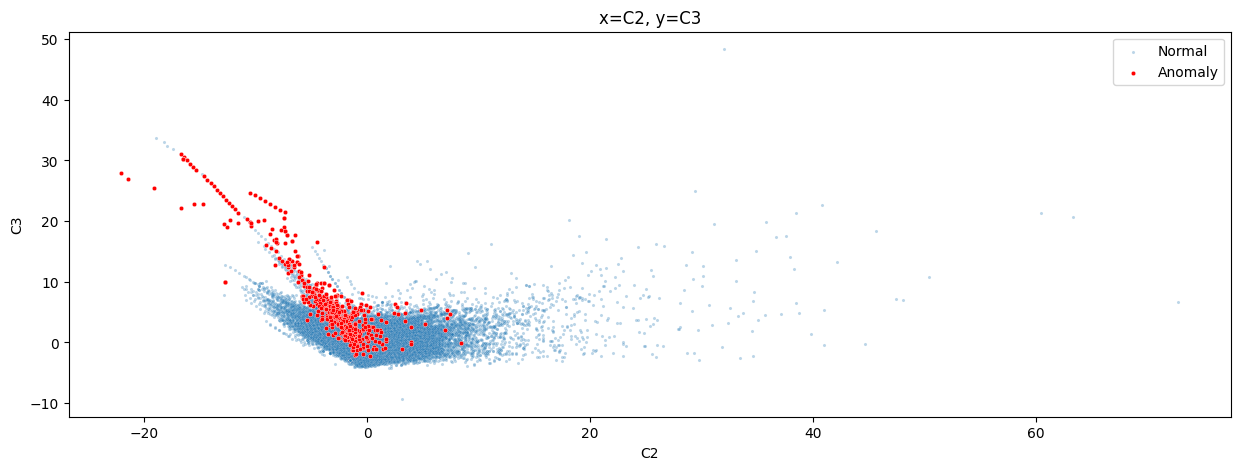

In [24]:
plot_cluster(data=data_pca, target=target, x="C2", y="C3", title="x=C2, y=C3")

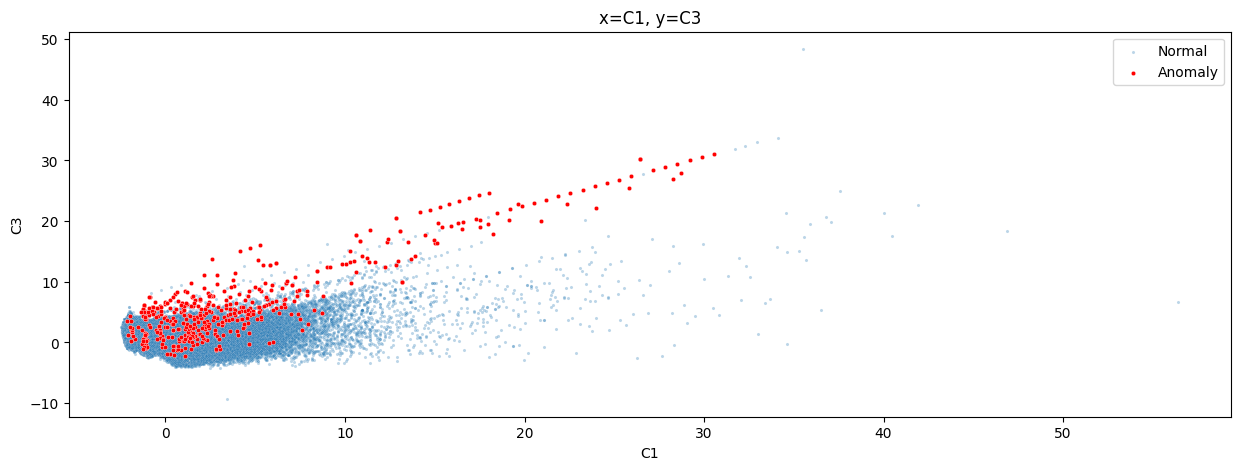

In [25]:
plot_cluster(data=data_pca, target=target, x="C1", y="C3", title="x=C1, y=C3")

## PCA + Estandarizacion

In [26]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [27]:
data1 = Normalizer().fit_transform(X)
data1 = pd.concat([pd.DataFrame(data1, columns=X.columns), y], axis=1)
print("dataN.shape=",data1.shape)
data1.head()

dataN.shape= (284807, 29)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.347638,-0.018607,0.648424,0.352329,-0.086493,0.118211,0.061254,0.025232,0.093003,0.023212,-0.141018,-0.157942,-0.253451,-0.079551,0.375343,-0.120259,0.053168,0.006593,0.103282,0.064274,-0.004680,0.071030,-0.028243,0.017110,0.032861,-0.048348,0.034145,-0.005382,0
1,0.445633,0.099513,0.062247,0.167564,0.022440,-0.030795,-0.029464,0.031819,-0.095503,-0.062431,0.602996,0.398290,0.182872,-0.053756,0.237634,0.173458,-0.042925,-0.068558,-0.054508,-0.025830,-0.084417,-0.238798,0.037871,-0.127068,0.062505,0.047072,-0.003359,0.005505,0
2,-0.223395,-0.220403,0.291622,0.062458,-0.082756,0.296110,0.130164,0.040733,-0.249100,0.034149,0.102705,0.010868,0.117966,-0.027291,0.385801,-0.475303,0.182545,-0.019959,-0.371985,0.086338,0.040786,0.126910,0.149562,-0.113359,-0.053884,-0.022876,-0.009103,-0.009827,0
3,-0.225535,-0.043233,0.418498,-0.201498,-0.002406,0.291106,0.055460,0.088096,-0.323742,-0.012826,-0.052864,0.041600,0.118514,-0.067204,-0.147378,-0.247329,-0.159672,0.458826,-0.287703,-0.048558,-0.025278,0.001231,-0.044422,-0.274388,0.151102,-0.051800,0.014640,0.014345,0
4,-0.324878,0.246200,0.434407,0.113049,-0.114216,0.026905,0.166317,-0.075883,0.229371,0.211233,-0.230803,0.150961,0.377504,-0.314061,0.049121,-0.126629,-0.066487,-0.010713,0.225374,0.114594,-0.002645,0.223913,-0.038556,0.039625,-0.057785,0.140890,0.061547,0.060349,0


In [28]:
X = data1.drop([target], axis=1).copy()
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.347638,-0.018607,0.648424,0.352329,-0.086493,0.118211,0.061254,0.025232,0.093003,0.023212,-0.141018,-0.157942,-0.253451,-0.079551,0.375343,-0.120259,0.053168,0.006593,0.103282,0.064274,-0.004680,0.071030,-0.028243,0.017110,0.032861,-0.048348,0.034145,-0.005382
1,0.445633,0.099513,0.062247,0.167564,0.022440,-0.030795,-0.029464,0.031819,-0.095503,-0.062431,0.602996,0.398290,0.182872,-0.053756,0.237634,0.173458,-0.042925,-0.068558,-0.054508,-0.025830,-0.084417,-0.238798,0.037871,-0.127068,0.062505,0.047072,-0.003359,0.005505
2,-0.223395,-0.220403,0.291622,0.062458,-0.082756,0.296110,0.130164,0.040733,-0.249100,0.034149,0.102705,0.010868,0.117966,-0.027291,0.385801,-0.475303,0.182545,-0.019959,-0.371985,0.086338,0.040786,0.126910,0.149562,-0.113359,-0.053884,-0.022876,-0.009103,-0.009827
3,-0.225535,-0.043233,0.418498,-0.201498,-0.002406,0.291106,0.055460,0.088096,-0.323742,-0.012826,-0.052864,0.041600,0.118514,-0.067204,-0.147378,-0.247329,-0.159672,0.458826,-0.287703,-0.048558,-0.025278,0.001231,-0.044422,-0.274388,0.151102,-0.051800,0.014640,0.014345
4,-0.324878,0.246200,0.434407,0.113049,-0.114216,0.026905,0.166317,-0.075883,0.229371,0.211233,-0.230803,0.150961,0.377504,-0.314061,0.049121,-0.126629,-0.066487,-0.010713,0.225374,0.114594,-0.002645,0.223913,-0.038556,0.039625,-0.057785,0.140890,0.061547,0.060349


In [29]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=10)

In [30]:
ft_imp = get_feature_importance(pca)
ft_imp

,pc,variance,cum_variance,ft_with_more_variance
0,C1,0.159816,0.159816,V1
1,C2,0.095498,0.255314,V3
2,C3,0.086683,0.341997,V4
3,C4,0.070546,0.412543,V6
4,C5,0.063769,0.476312,V11
5,C6,0.05733,0.533642,V13
6,C7,0.051521,0.585163,V9
7,C8,0.044841,0.630003,V15
8,C9,0.037912,0.667915,V15
9,C10,0.036907,0.704823,V18


In [31]:
Xpca = pca.transform(X)
Xpca = pd.DataFrame(Xpca, columns=ft_imp["pc"], index=X.index)
data_pca = pd.concat([y, Xpca], axis=1)
data_pca.head()

,Class,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,0,-0.519609,-0.589123,-0.243266,0.062207,0.324309,0.245619,0.106814,-0.151234,0.087626,0.080978
1,0,0.318697,-0.165957,-0.278489,0.049318,-0.616130,-0.374137,-0.146170,-0.279044,-0.044330,0.145794
2,0,-0.305243,-0.349926,0.099545,0.180706,0.084279,-0.169597,0.376948,-0.031670,0.391607,0.425500
3,0,-0.471718,-0.207491,0.302230,0.223170,0.030085,-0.227167,0.179164,0.057994,0.028802,-0.279146
4,0,-0.486107,-0.219678,-0.180555,-0.086802,0.317722,-0.423322,-0.053336,0.194429,0.052535,-0.126281


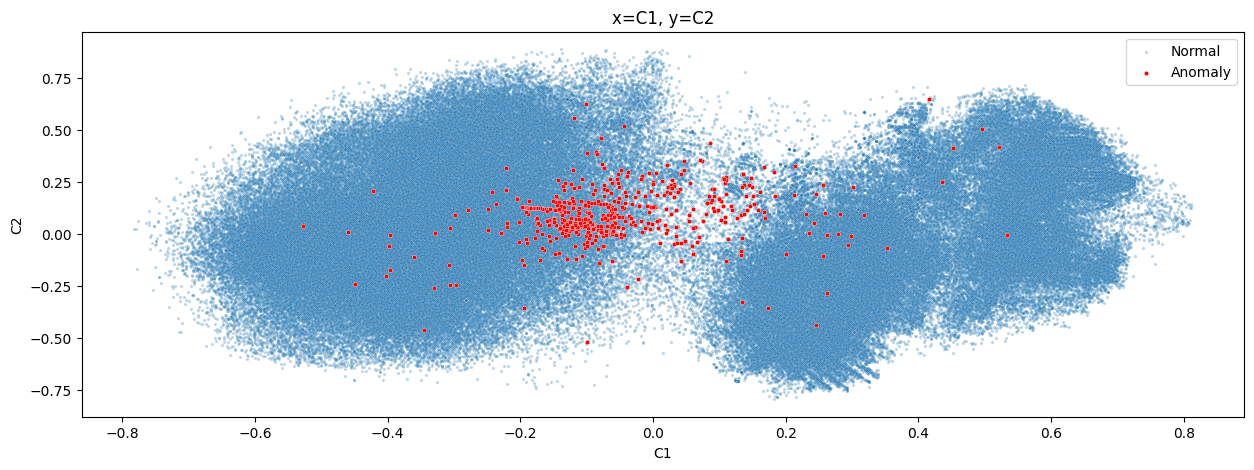

In [32]:
plot_cluster(data=data_pca, target=target, x="C1", y="C2", title="x=C1, y=C2")

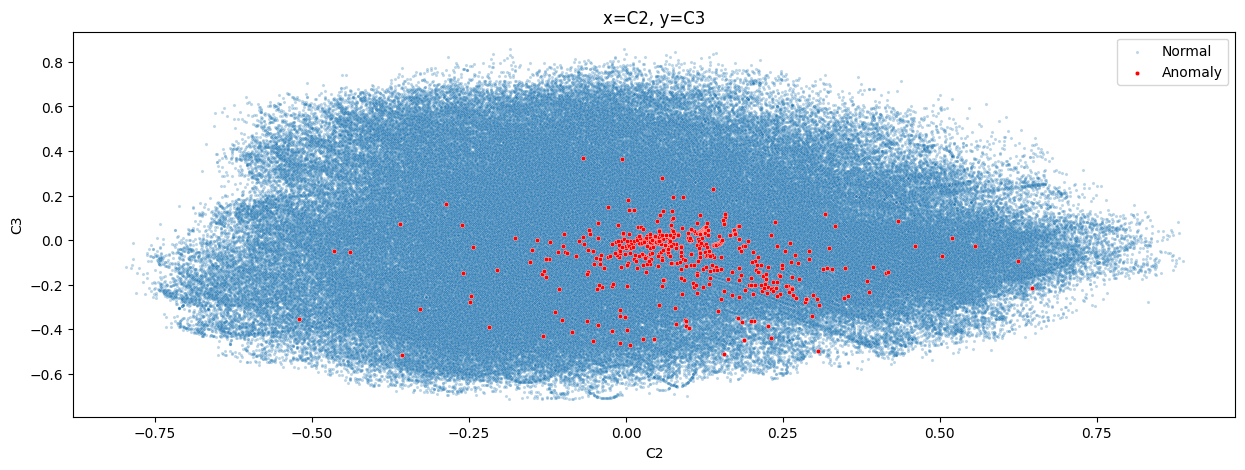

In [33]:
plot_cluster(data=data_pca, target=target, x="C2", y="C3", title="x=C2, y=C3")

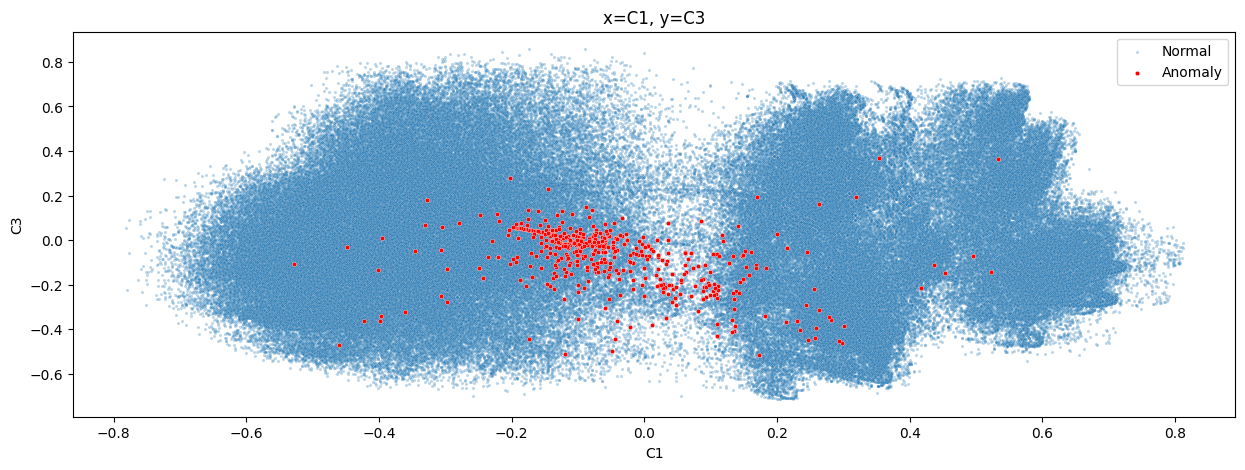

In [34]:
plot_cluster(data=data_pca, target=target, x="C1", y="C3", title="x=C1, y=C3")